<a href="https://colab.research.google.com/github/Mwadz/Hass-Consulting-Company-w7/blob/main/Regression_week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hass Consulting Company

# Question Definition

**a) Objective**

To create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables

**b) Success Metric**

Delivering a high accuracy prediction model.

**c) The context**

* I am a Data Scientist working for Hass Consulting Company which is a real estate leader with over 25 years of experience.
* I have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. 

**d) Experimental Design**

The process will entail:

    i) Reading and exploring the given dataset.

    ii) Defining the appropriateness of the available data to answer the given question.

    iii) Finding and deciding what to do with outliers, anomalies, and missing data within the dataset.

    iv) Performing exploratory data analysis while recording the observations.

    v) Performing regression analysis. Incorporating categorical independent variables into the models(depending on whether necessary). 

    vi) Checking for multicollinearity.

    vii) Providing a recommendation based on the analysis. 

    viii) Createing residual plots for the models, and assess heteroskedasticity.

    ix) Challenge the solution by providing insights on how we can make improvements in model improvement.

**e) Data Relevance**
The appropriate dataset to use for this project is that which contains data with information on real estate properties collected over the past few months. The data provided is useful and very relevant.

In [54]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [55]:
# let's load the dataset
estate = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')

In [56]:
# Previwing the dataset
print(estate.shape)
estate.head()

(21613, 20)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [57]:
estate.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [58]:
estate.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

# A) Data Cleaning

In [59]:
estate.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [60]:
# checking for duplictes
estate.duplicated().sum()

3

In [61]:
# dropping the duplicates
estate.drop_duplicates(keep=False, inplace=True)
# confirming
estate.duplicated().sum()

0

In [62]:
estate.drop(['id'], axis=1, inplace=True)


In [63]:
estate.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

# B) EDA

## Descriptive Analysis

In [64]:
# setting our y as rank

y= estate['price']


In [65]:
target = pd.DataFrame(y)
target

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


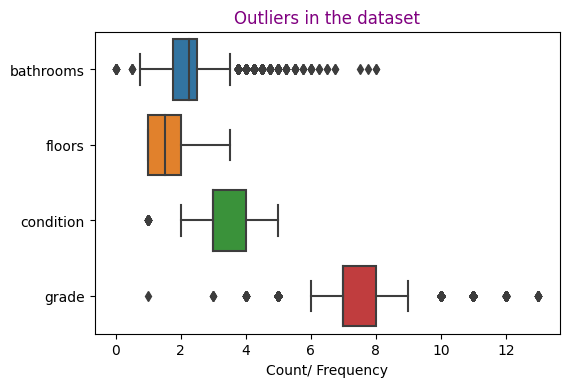

In [66]:
# checking for outliers
col = estate[['bathrooms','floors',	'condition',	'grade']]
# check for outliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = col, orient="h")
plt.title('Outliers in the dataset', color = 'Purple')
plt.xlabel('Count/ Frequency')
plt.show()

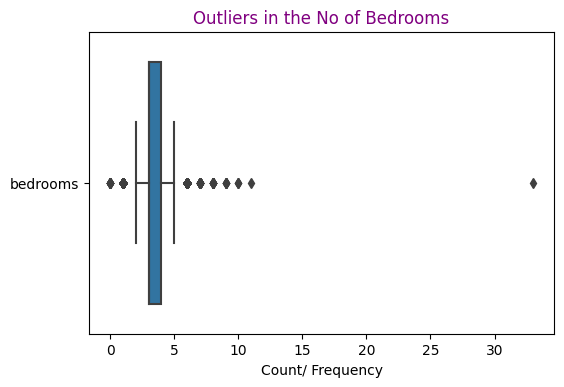

In [67]:
# checking for outliers
col = estate[['bedrooms']]
# check for outliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = col, orient="h")
plt.title('Outliers in the No of Bedrooms', color = 'Purple')
plt.xlabel('Count/ Frequency')
plt.show()

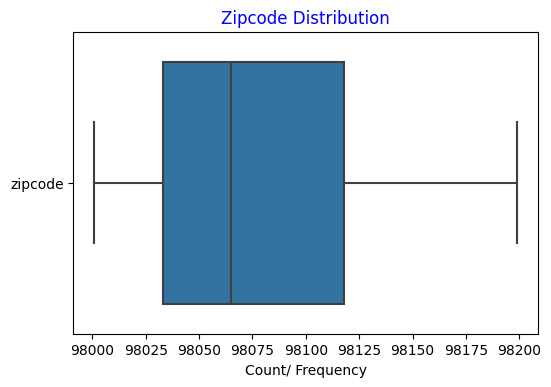

In [68]:
	# checking for outliers
col = estate[['zipcode']]
# check for outliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = col, orient="h")
plt.title('Zipcode Distribution', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()

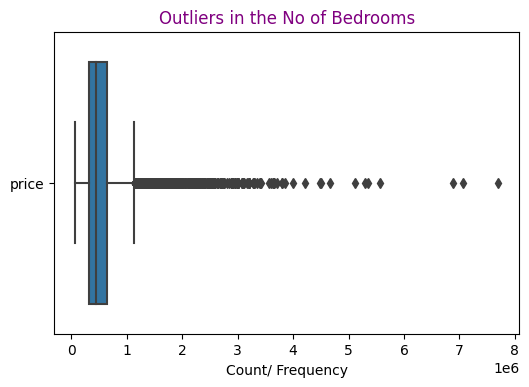

In [69]:
# checking for outliers
col = estate[['price']]
# check for outliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = col, orient="h")
plt.title('Outliers in the No of Bedrooms', color = 'Purple')
plt.xlabel('Count/ Frequency')
plt.show()

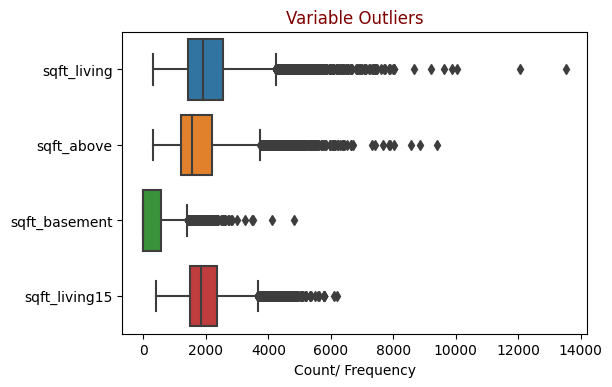

In [70]:
# checking for outliers
col = estate[['sqft_living','sqft_above',	'sqft_basement','sqft_living15']]
# check for outliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = col, orient="h")
plt.title('Variable Outliers', color = 'maroon')
plt.xlabel('Count/ Frequency')
plt.show()

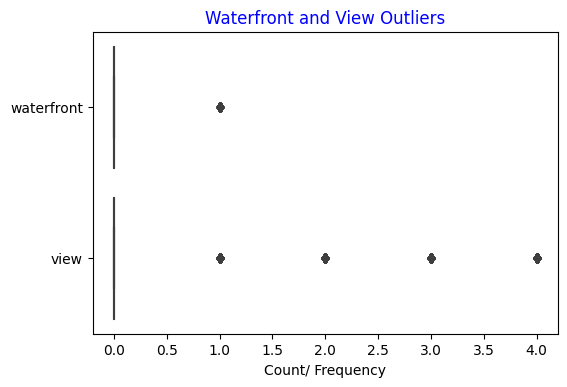

In [71]:
	# checking for outliers
col = estate[['waterfront', 'view']]
# check for outliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = col, orient="h")
plt.title('Waterfront and View Outliers', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()
  

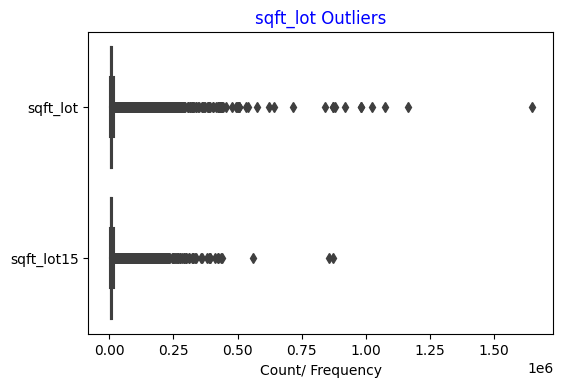

In [72]:
	# checking for outliers
col = estate[['sqft_lot','sqft_lot15',]]
# check for outliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = col, orient="h")
plt.title('sqft_lot Outliers', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()

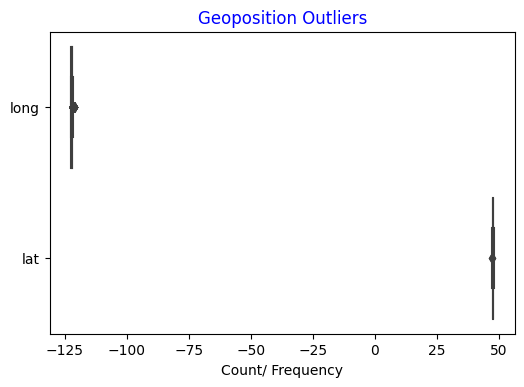

In [73]:
# checking for outliers in geographical positioning
col = estate[['long','lat']]
# check for outliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = col, orient="h")
plt.title('Geoposition Outliers', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()
  

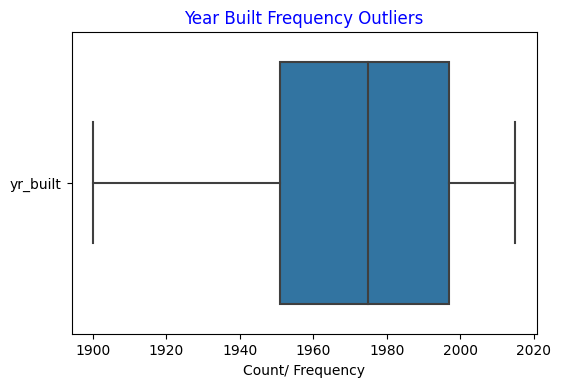

In [74]:
	# checking for outliers
col = estate[['yr_built']]
# check for outliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = col, orient="h")
plt.title('Year Built Frequency Outliers', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()
  

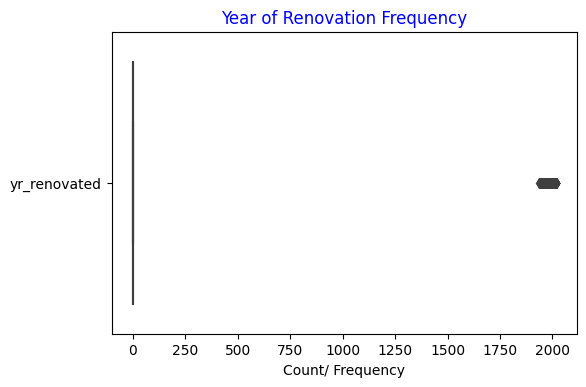

In [75]:

	# checking for outliers
col = estate[['yr_renovated']]
# check for outliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = col, orient="h")
plt.title('Year of Renovation Frequency', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()

In [76]:
# getting descriptive statistics
estate.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160700e+04,21607.000000,21607.000000,21607.000000,2.160700e+04,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000
mean,5.401757e+05,3.370852,2.114720,2079.862683,1.510961e+04,1.494169,0.007544,0.234091,3.409451,7.656685,1788.305086,291.557597,1971.002083,84.242421,98077.951543,47.560045,-122.213923,1986.484889,12769.608460
std,3.674129e+05,0.930158,0.770244,918.559712,4.142594e+04,0.539998,0.086529,0.765955,0.650785,1.175542,828.186477,442.618358,29.371866,401.319142,53.505719,0.138580,0.140837,685.460263,27307.765664
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.215000e+05,3.000000,1.750000,1423.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470850,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069200e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Univariate Analysis

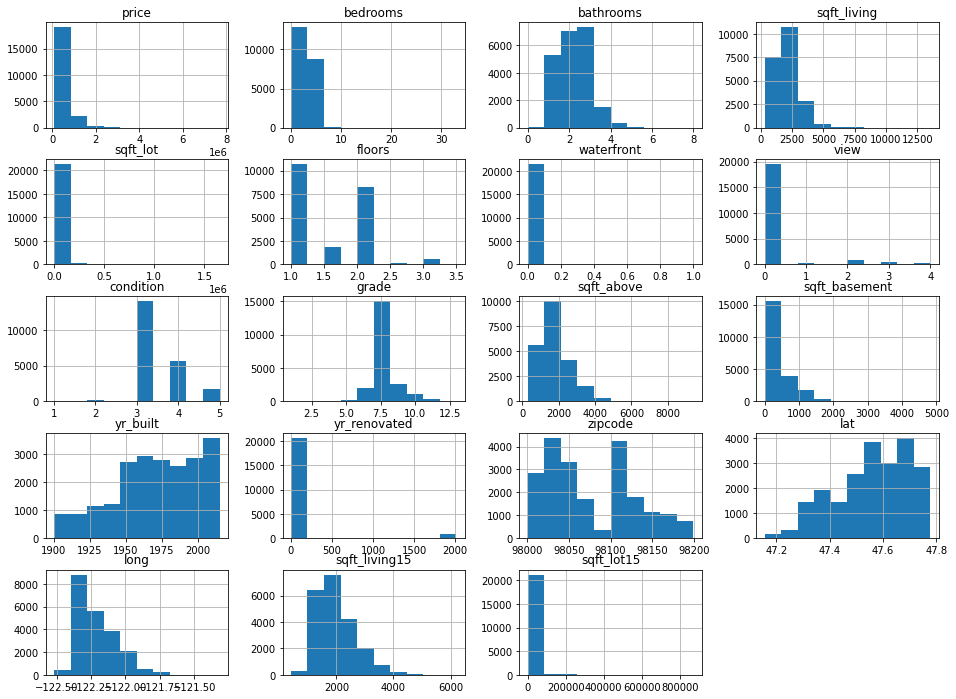

In [77]:
# plotting the histogram for every variable
estate.hist(bins=10, figsize=(16,12))
plt.show()

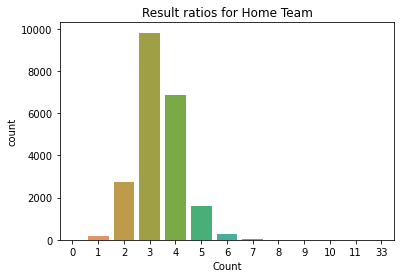

In [78]:
%matplotlib inline
sns.countplot(data=estate, x='bedrooms')
plt.title("Result ratios for Home Team")
plt.xlabel("Count")
plt.show()

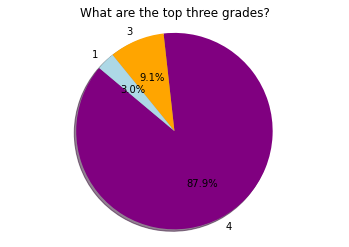

In [79]:
# finding out what proportion makes up the top 3 most frequent grades
gradedf = estate[estate['grade'] < 5]
plt.pie(gradedf['grade'].value_counts(normalize=True), labels =gradedf['grade'].value_counts().index,colors = ['purple', 'orange','lightblue'], autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('What are the top three grades?')
plt.show()

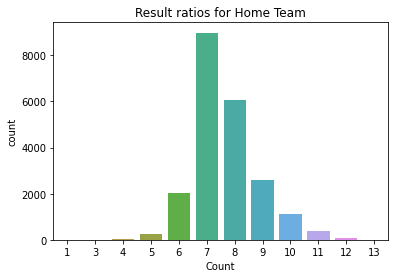

In [80]:
%matplotlib inline
sns.countplot(data=estate, x='grade')
plt.title("Result ratios for Home Team")
plt.xlabel("Count")
plt.show()

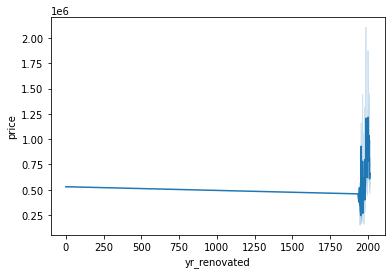

In [81]:
sns.lineplot(data=estate, x="yr_renovated", y="price");


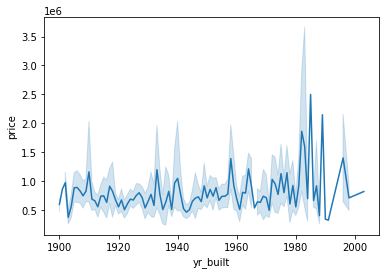

In [82]:
select = estate[estate['yr_renovated'] > 1900] # this selects recent data moreor less where we see activity in the previous graph
#plotting the graph of price per year renovated
sns.lineplot(data=select, x="yr_built", y="price");


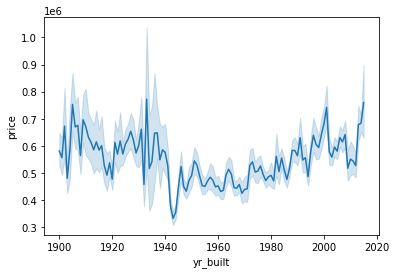

In [83]:
#checking the price per year built
sns.lineplot(data=estate, x="yr_built", y="price");

## Bivariate Analysis

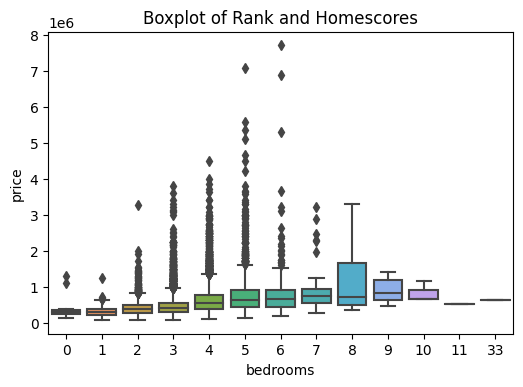

In [84]:
# prompting system to ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# can add pallete to boxplot
plt.figure(dpi = 100)
sns.boxplot(estate['bedrooms'],y)
plt.title("Boxplot of Rank and Homescores")
plt.show()

<Figure size 600x400 with 0 Axes>

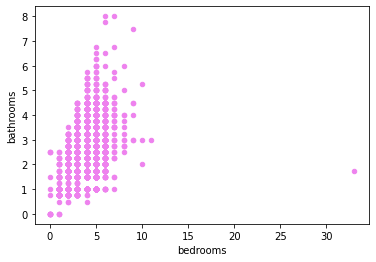

In [85]:
# plotting bedrooms against bathrooms
plt.figure(dpi = 100)
estate.plot(x = 'bedrooms', y = 'bathrooms', kind='scatter', color='violet')
plt.show()

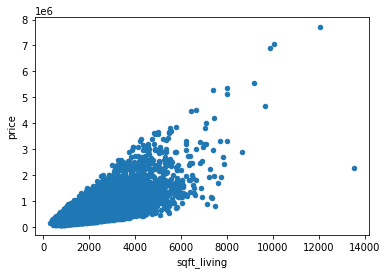

In [86]:
# findng out the price by sqft_living space
estate.plot(x = 'sqft_living', y = 'price', kind='scatter');

In [87]:
# observing the correlation
estate.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308354,0.525146,0.702048,0.089660,0.256801,0.266333,0.397586,0.036402,0.667494,0.605572,0.323860,0.053979,0.126565,-0.053156,0.306925,0.021564,0.585391,0.082459
bedrooms,0.308354,1.000000,0.515986,0.576677,0.031695,0.175467,-0.006584,0.079335,0.028372,0.357039,0.477637,0.303060,0.154373,0.018550,-0.152773,-0.008975,0.129474,0.391628,0.029221
bathrooms,0.525146,0.515986,1.000000,0.754710,0.087761,0.500685,0.063750,0.188045,-0.124897,0.664997,0.685359,0.283858,0.505974,0.051020,-0.203796,0.024606,0.223052,0.568696,0.087207
sqft_living,0.702048,0.576677,0.754710,1.000000,0.172835,0.353958,0.103822,0.284670,-0.058783,0.762734,0.876604,0.435065,0.318149,0.055265,-0.199440,0.052512,0.240220,0.756419,0.183285
sqft_lot,0.089660,0.031695,0.087761,0.172835,1.000000,-0.005142,0.021598,0.074795,-0.008976,0.113667,0.183541,0.015257,0.053130,0.007712,-0.129648,-0.085677,0.229583,0.144632,0.718555
floors,0.256801,0.175467,0.500685,0.353958,-0.005142,1.000000,0.023724,0.029205,-0.263789,0.458120,0.523864,-0.245642,0.489375,0.005973,-0.058930,0.049572,0.125266,0.279838,-0.011231
waterfront,0.266333,-0.006584,0.063750,0.103822,0.021598,0.023724,1.000000,0.402128,0.016652,0.082795,0.072085,0.080582,-0.026157,0.093016,0.030269,-0.014270,-0.041897,0.086475,0.030700
view,0.397586,0.079335,0.188045,0.284670,0.074795,0.029205,0.402128,1.000000,0.045682,0.251435,0.167669,0.277046,-0.053019,0.102498,0.084849,0.005942,-0.078720,0.280369,0.072580
condition,0.036402,0.028372,-0.124897,-0.058783,-0.008976,-0.263789,0.016652,0.045682,1.000000,-0.144635,-0.158211,0.174037,-0.361278,-0.061106,0.002899,-0.015002,-0.106524,-0.092883,-0.003443
grade,0.667494,0.357039,0.664997,0.762734,0.113667,0.458120,0.082795,0.251435,-0.144635,1.000000,0.755914,0.168494,0.446969,0.014330,-0.184728,0.114088,0.198322,0.713214,0.119283


In [88]:
# Installing heatmapz
!pip install heatmapz


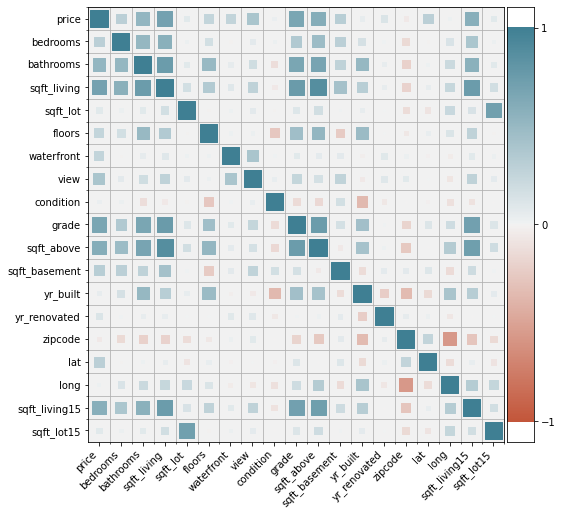

In [89]:
# Importing the two methods from heatmap library
from heatmap import heatmap, corrplot

# checking for correlation in the rank dataset
plt.figure(figsize=(8, 8))
corrplot(estate.corr(), size_scale=300);

# Multicollinearity Analysis
* We're doing this in preparation for Multiple Linear Regression


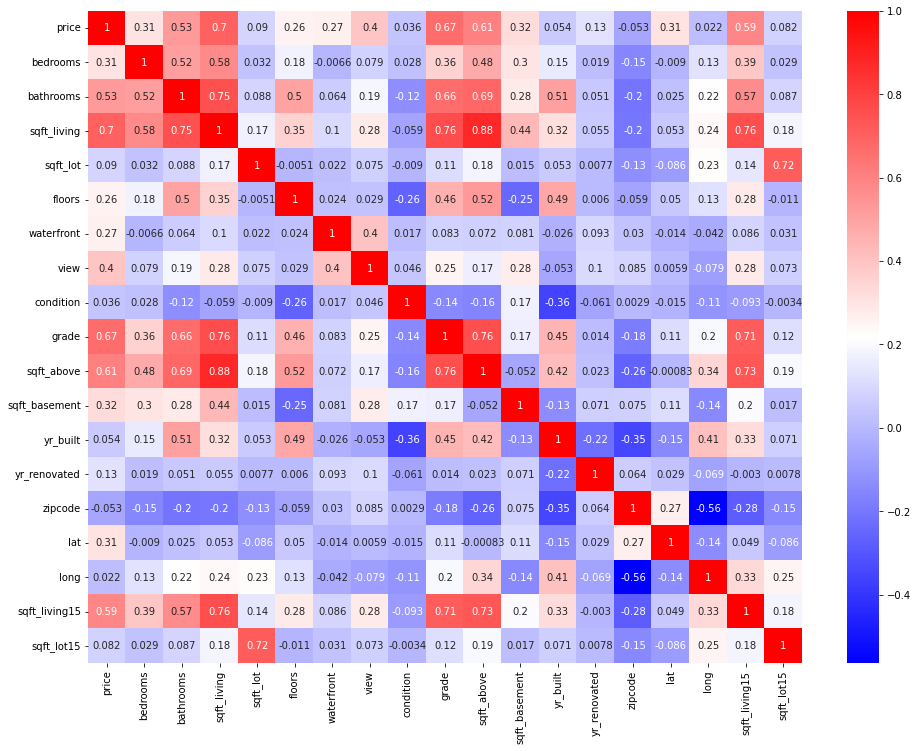

In [90]:
# plotting a correlation heat map so we know  which specific pionts to observe closely
plt.figure(figsize=(16, 12))
sns.heatmap(estate.corr(), cmap='bwr', annot=True);

In [91]:
#Import libaries

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Importing LinearRegression from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [92]:
# defining a correlation matrix so we can generate the VIF 
corr = estate.corr()
corr


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308354,0.525146,0.702048,0.089660,0.256801,0.266333,0.397586,0.036402,0.667494,0.605572,0.323860,0.053979,0.126565,-0.053156,0.306925,0.021564,0.585391,0.082459
bedrooms,0.308354,1.000000,0.515986,0.576677,0.031695,0.175467,-0.006584,0.079335,0.028372,0.357039,0.477637,0.303060,0.154373,0.018550,-0.152773,-0.008975,0.129474,0.391628,0.029221
bathrooms,0.525146,0.515986,1.000000,0.754710,0.087761,0.500685,0.063750,0.188045,-0.124897,0.664997,0.685359,0.283858,0.505974,0.051020,-0.203796,0.024606,0.223052,0.568696,0.087207
sqft_living,0.702048,0.576677,0.754710,1.000000,0.172835,0.353958,0.103822,0.284670,-0.058783,0.762734,0.876604,0.435065,0.318149,0.055265,-0.199440,0.052512,0.240220,0.756419,0.183285
sqft_lot,0.089660,0.031695,0.087761,0.172835,1.000000,-0.005142,0.021598,0.074795,-0.008976,0.113667,0.183541,0.015257,0.053130,0.007712,-0.129648,-0.085677,0.229583,0.144632,0.718555
floors,0.256801,0.175467,0.500685,0.353958,-0.005142,1.000000,0.023724,0.029205,-0.263789,0.458120,0.523864,-0.245642,0.489375,0.005973,-0.058930,0.049572,0.125266,0.279838,-0.011231
waterfront,0.266333,-0.006584,0.063750,0.103822,0.021598,0.023724,1.000000,0.402128,0.016652,0.082795,0.072085,0.080582,-0.026157,0.093016,0.030269,-0.014270,-0.041897,0.086475,0.030700
view,0.397586,0.079335,0.188045,0.284670,0.074795,0.029205,0.402128,1.000000,0.045682,0.251435,0.167669,0.277046,-0.053019,0.102498,0.084849,0.005942,-0.078720,0.280369,0.072580
condition,0.036402,0.028372,-0.124897,-0.058783,-0.008976,-0.263789,0.016652,0.045682,1.000000,-0.144635,-0.158211,0.174037,-0.361278,-0.061106,0.002899,-0.015002,-0.106524,-0.092883,-0.003443
grade,0.667494,0.357039,0.664997,0.762734,0.113667,0.458120,0.082795,0.251435,-0.144635,1.000000,0.755914,0.168494,0.446969,0.014330,-0.184728,0.114088,0.198322,0.713214,0.119283


In [93]:
# generating the VIF
# 
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)
vif

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,3.331762,0.301456,-0.286414,-6.494247e-01,-0.048034,-0.033563,-0.456809,-0.369128,-0.156345,-1.023223,-7.627870e-01,-2.817715e-01,0.698362,-0.073690,0.282772,-0.757790,0.273993,-0.134942,0.094651
bedrooms,0.301456,1.679531,-0.487598,-7.159054e-01,0.044947,0.046966,0.021588,0.081352,-0.064646,0.214253,-3.523281e-01,-1.912162e-01,0.197707,0.039479,0.105821,-0.017676,0.042504,0.013146,0.093996
bathrooms,-0.286414,-0.487598,3.376327,6.602728e-01,-0.019810,-0.672860,0.049705,-0.011399,-0.124072,-0.179888,-1.747389e+00,-1.337219e+00,-0.995745,-0.254758,0.017473,0.023939,0.029872,0.103508,0.063279
sqft_living,-0.688224,-0.725379,0.642892,9.381121e+13,0.180661,-0.488559,0.027079,0.150574,-0.126835,0.361384,-8.458152e+13,-4.520399e+13,-0.421043,-0.104109,-0.342623,0.118426,-0.225242,-1.469187,-0.341763
sqft_lot,-0.048034,0.044947,-0.019810,1.878785e-01,2.103224,0.045583,0.034014,-0.053900,0.032737,-0.039126,-3.492632e-01,-1.245764e-01,0.088638,0.022208,-0.006626,0.064237,-0.137201,0.165868,-1.460662
floors,-0.033563,0.046966,-0.672860,-4.913064e-01,0.045583,2.012380,-0.001167,-0.035786,0.091566,-0.220495,-4.967461e-02,8.566733e-01,-0.488204,-0.078624,-0.173714,-0.119771,0.161735,0.274008,0.071702
waterfront,-0.456809,0.021588,0.049705,2.177257e-02,0.034014,-0.001167,1.266806,-0.442556,0.008465,0.189596,5.492512e-02,6.834880e-02,-0.116905,-0.056197,-0.016197,0.113631,-0.010522,0.072843,-0.031468
view,-0.369128,0.081352,-0.011399,1.545206e-01,-0.053900,-0.035786,-0.442556,1.476380,-0.003454,-0.071941,5.145521e-02,-2.635005e-01,0.074379,-0.029834,-0.171927,0.202737,0.042006,-0.310211,-0.017930
condition,-0.156345,-0.064646,-0.124072,-1.277584e-01,0.032737,0.091566,0.008465,-0.003454,1.256862,-0.006547,2.346736e-01,-7.657224e-03,0.528700,0.210614,0.148021,0.099340,-0.019580,0.082288,-0.032672
grade,-1.023223,0.214253,-0.179888,3.400143e-01,-0.039126,-0.220495,0.189596,-0.071941,-0.006547,3.731160,-1.500238e+00,-4.660283e-01,-0.853309,-0.048891,-0.003853,-0.098125,0.309451,-0.870155,0.042784


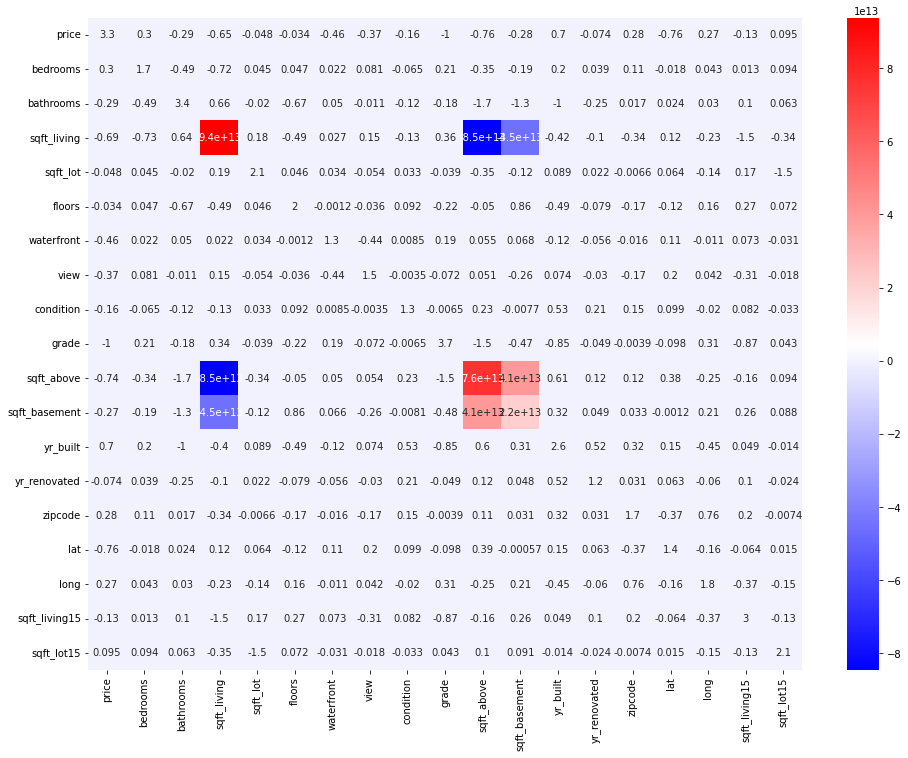

In [94]:
plt.figure(figsize=(16, 12))
sns.heatmap(vif, cmap='bwr', annot=True);

**Observation:**

* sqft_above, sqft_living and sqft_basement seem to have qsomething peculiar going on

In [95]:
estate.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [96]:
# Seeing as the three features have abnormal vif values let's read the table to understand what is going on
# declaring features
m = estate[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]

In [97]:
# importing vif method
from statsmodels.stats.outliers_influence import variance_inflation_factor
#using variance inflation factor to check correlation
 
# creating a dataframe
vif = pd.DataFrame()
vif["feature"] = m.columns
  
# calculating VIF for each feature
vif["vif"] = [variance_inflation_factor(m.values, i)
                          for i in range(len(m.columns))]
  

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [98]:
# displaying VIF table
vif

,feature,vif
0,bedrooms,2.327080e+01
1,bathrooms,2.861353e+01
2,sqft_living,inf
3,sqft_lot,2.377681e+00
4,floors,1.688918e+01
5,waterfront,1.213238e+00
6,view,1.552012e+00
7,condition,3.471010e+01
8,grade,1.473456e+02
9,sqft_above,inf


* VIF = infinity occurs when there is perfect correlation.
* This shows a perfect correlation between the sqft_living, sqft_above and sqft_basement variables.
* In this case of perfect correlation, we got R2 =1, which lead to 1/(1-R2) infinity. 
* To solve this problem we need to drop one of the variables from the dataset which is causing this perfect multicollinearity

In [99]:
# dropping sqft_above column
m1 = estate[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]


In [100]:
# checking vif after dropping sqft_above
# creating a dataframe
# creating a dataframe
vif = pd.DataFrame()
vif["feature"] = m1.columns
  
# calculating VIF for each feature
vif["vif"] = [variance_inflation_factor(m1.values, i)
                          for i in range(len(m1.columns))]
  
vif

,feature,vif
0,bedrooms,2.327080e+01
1,bathrooms,2.861353e+01
2,sqft_living,3.701041e+01
3,sqft_lot,2.377681e+00
4,floors,1.688918e+01
5,waterfront,1.213238e+00
6,view,1.552012e+00
7,condition,3.471010e+01
8,grade,1.473456e+02
9,sqft_basement,2.793394e+00


* We've gotten rid of the state of perfect correlation, now we have to deal with the yr_built column since it's VIF is higher than 5 indicating high correlation. 

In [101]:
# dropping yr_built column
m2 = estate[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade',
       'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
# checking vif after dropping sqft_above
# creating a dataframe
vif = pd.DataFrame()
vif["feature"] = m2.columns
  
# calculating VIF for each feature
vif["vif"] = [variance_inflation_factor(m2.values, i)
                          for i in range(len(m2.columns))]
  
vif

,feature,vif
0,bedrooms,2.321363e+01
1,bathrooms,2.519046e+01
2,sqft_living,3.626979e+01
3,sqft_lot,2.375512e+00
4,floors,1.640356e+01
5,waterfront,1.212910e+00
6,view,1.526845e+00
7,condition,3.179115e+01
8,grade,1.410821e+02
9,sqft_basement,2.789524e+00


* After dropping sqft_above and yr_built columns the variance inflation factors of all variables now range between values 1-3 which is moderate correlation suitable for modeling.

* in order to build a suitable model we'll have to drop the sqft_above and yr_bult columns from the dataset

In [102]:
#@title Creating a Multicollinearity free DF
# we do this by dropping the columns 
estate1 = estate.drop(['yr_built', 'sqft_above'], axis=1)


In [52]:
# previewing target variable
target.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [117]:
# defining X forbuilding a multiple linear regression model
X = estate1.drop(['price'], axis=1)

# Multiple Linear Regression

In [105]:
# scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# normalizing the y variable
y = np.log(y)

from sklearn.preprocessing import MinMaxScaler

#scaled_data = MinMaxScaler()
#X = scaler.fit_transform(X)

# Splitting our Data into Training and Test sets

# import train_test_split for the splitting of the data
from sklearn.model_selection import train_test_split

# split this data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
# the script above splits 80% of the data to training set and 20% of the data to test set


* the code above splits 70% of the data to training set and 30% of the data to test set

In [106]:
# Training the Algorithm

# import the desired model, in this this case we are importing linear regression model
from sklearn.linear_model import LinearRegression

# instantiate the model
linear = LinearRegression()

# train the algorithm by fitting it to our training data 
linear.fit(X_train, y_train)

LinearRegression()

In [115]:
# print the regressor intercept and coefficients for the predictor variables.
print('Intercept: ',linear.intercept_)
print('Coefficients: ',linear.coef_)

Intercept:  13.049577653912255
Coefficients:  [-0.0062209   0.01345867  0.15291376  0.02587638  0.01943987  0.03211733
  0.05153351  0.06117945  0.15577683  0.0035946   0.03659402 -0.02578012
  0.20755283 -0.04205407  0.07239347 -0.01052358]


In [119]:
# reshaping the coefficient array s we can place it in a dataframe
coef = linear.coef_.reshape(16,1)
coef= pd.DataFrame(coef , X.columns,columns=['Coefficient'] )
coef

,Coefficient
bedrooms,-0.006221
bathrooms,0.013459
sqft_living,0.152914
sqft_lot,0.025876
floors,0.019440
waterfront,0.032117
view,0.051534
condition,0.061179
grade,0.155777
sqft_basement,0.003595


In [120]:
# Making Predictions

# obtain the trained model's predictions of the based on X_test 
y_pred = linear.predict(X_test) # the y_pred is a numpy array that contains all the predicted values
error= (y_pred-y_test)

# create a dataframe that compares the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred, 'Error':error})

# display top 10 records in the comparison dataframe
df.head(10)


,Actual,Prediction,Error
8247,12.721886,12.441822,-0.280063
16026,13.255144,13.051476,-0.203668
7067,13.122263,12.967812,-0.154452
10224,13.217674,12.931776,-0.285898
6717,12.495004,12.706290,0.211286
10440,13.262125,13.602354,0.340229
2266,12.254863,12.644116,0.389253
9353,12.611538,12.649515,0.037977
20692,13.126355,12.960576,-0.165779
11250,13.361380,12.996909,-0.364471


In [121]:
# Evaluating the Algorithm

# import metrics
from sklearn import metrics

# evaluate the performance of the model by computing the MAE, MSE, and RMSE scores
print('Mean Absolute Error:',(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:',(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:', (np.sqrt(metrics.mean_squared_error(y_test, y_pred))))


Mean Absolute Error: 0.20730559461307363
Mean Squared Error: 0.06985867779512697
Root Mean Squared Error: 0.26430792230867195



* generally RMSE values between 0.2 - 0.5 show that the model can relatively predict the data accurately.
* MAE score suggests an error of about +/- 0.2073 for every prediction
* the MSE value is also very low at 0.0699 which is close to 0(a good sign)
* It's safe to say that our model is good at predicting.

## Residuals Plot

In [122]:
# creating the residual by subtracting the test value from the predicted value
residuals = np.subtract(y_pred, y_test)
residuals.head()

8247    -0.280063
16026   -0.203668
7067    -0.154452
10224   -0.285898
6717     0.211286
Name: price, dtype: float64

In [123]:
# computing the mean of the residuals 
residuals.mean()

0.00581671605452388

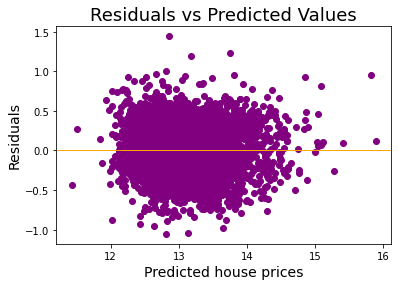

In [124]:
#Step 4
# create residual scatter plot of residuals vs predicted values
plt.scatter(y_pred, residuals, color = 'purple')

plt.title('Residuals vs Predicted Values', fontsize = 18,)
plt.ylabel('Residuals', fontsize = 14)
plt.xlabel('Predicted house prices', fontsize = 14)
plt.axhline(y = residuals.mean(), color = 'orange', linewidth = 1)
plt.show()

* The residuals have a normal distribution



## Heteroskedasticity

**The null hypothesis (H0)**: Signifies that Homoscedasticity is present.

**The alternative hypothesis(Ha)**: Signifies that the Homoscedasticity is not present (i.e. heteroscedasticity exists)

In [125]:
!pip3 install numpy pandas statsmodels


In [126]:
import scipy as sp
# compute the test result and p-value of the test

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# compute the critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

# If the test_result is greater than the critical value, reject the null hypothesis. 
# This means there are patterns to the variance of the data

# Otherwise, identify no patterns, and  accept the null hypothesis 
# The variance is homogeneous across our data

if(test_result > critical_value):
    print("the variances are not homogeneous.")
else:
    print("The variances are homogeneous!")
    import scipy as sp

The variances are homogeneous!


* We fail to reject the hypothesis since the vriances are equal, thus we don't need to reassess the model. The test method used is bartlett's test

# Quantile Regression

In [135]:
# Defining the range of the quantiles
quantiles = np.arange(0.1, 1.0, 0.1)

# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

mod = smf.quantreg('price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + condition + grade + sqft_basement + yr_built + zipcode + sqft_living15 + sqft_lot15', estate)

for qt in quantiles:
  res = mod.fit(qt)
  print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2546
Model:                       QuantReg   Bandwidth:                   2.172e+04
Method:                 Least Squares   Sparsity:                    5.354e+05
Date:                Sun, 24 Apr 2022   No. Observations:                21607
Time:                        20:54:14   Df Residuals:                    21594
                                        Df Model:                           12
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -9.8510      0.530    -18.573      0.000     -10.891      -8.811
bedrooms      -1.687e+04   1449.685    -11.639      0.000   -1.97e+04    -1.4e+04
bathrooms      2.732e+04   2465.208     11.080      0.000    2.25e+04    3.21e+04
sqft_living      42.6527      2.653  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2981
Model:                       QuantReg   Bandwidth:                   2.045e+04
Method:                 Least Squares   Sparsity:                    3.853e+05
Date:                Sun, 24 Apr 2022   No. Observations:                21607
Time:                        20:54:22   Df Residuals:                    21594
                                        Df Model:                           12
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -69.1689      0.539   -128.259      0.000     -70.226     -68.112
bedrooms      -2.213e+04   1363.257    -16.236      0.000   -2.48e+04   -1.95e+04
bathrooms      2.828e+04   2413.119     11.717      0.000    2.35e+04     3.3e+04
sqft_living      49.2009      2.625  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3325
Model:                       QuantReg   Bandwidth:                   2.170e+04
Method:                 Least Squares   Sparsity:                    3.690e+05
Date:                Sun, 24 Apr 2022   No. Observations:                21607
Time:                        20:54:27   Df Residuals:                    21594
                                        Df Model:                           12
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -6.1427      0.605    -10.151      0.000      -7.329      -4.957
bedrooms      -2.491e+04   1515.584    -16.434      0.000   -2.79e+04   -2.19e+04
bathrooms      3.129e+04   2682.551     11.663      0.000     2.6e+04    3.65e+04
sqft_living      61.0862      2.923  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3616
Model:                       QuantReg   Bandwidth:                   2.320e+04
Method:                 Least Squares   Sparsity:                    3.431e+05
Date:                Sun, 24 Apr 2022   No. Observations:                21607
Time:                        20:54:31   Df Residuals:                    21594
                                        Df Model:                           12
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -11.1126      0.614    -18.099      0.000     -12.316      -9.909
bedrooms      -2.657e+04   1529.092    -17.376      0.000   -2.96e+04   -2.36e+04
bathrooms      3.184e+04   2685.903     11.854      0.000    2.66e+04    3.71e+04
sqft_living      72.4547      2.959  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3851
Model:                       QuantReg   Bandwidth:                   2.428e+04
Method:                 Least Squares   Sparsity:                    3.392e+05
Date:                Sun, 24 Apr 2022   No. Observations:                21607
Time:                        20:54:35   Df Residuals:                    21594
                                        Df Model:                           12
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -18.1121      0.630    -28.739      0.000     -19.347     -16.877
bedrooms      -3.171e+04   1579.514    -20.073      0.000   -3.48e+04   -2.86e+04
bathrooms      4.462e+04   2716.624     16.427      0.000    3.93e+04    4.99e+04
sqft_living      87.5775      3.058  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.4082
Model:                       QuantReg   Bandwidth:                   2.386e+04
Method:                 Least Squares   Sparsity:                    3.590e+05
Date:                Sun, 24 Apr 2022   No. Observations:                21607
Time:                        20:54:38   Df Residuals:                    21594
                                        Df Model:                           12
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -21.3726      0.669    -31.926      0.000     -22.685     -20.060
bedrooms       -3.06e+04   1693.326    -18.071      0.000   -3.39e+04   -2.73e+04
bathrooms       3.98e+04   2832.497     14.052      0.000    3.43e+04    4.54e+04
sqft_living      95.5308      3.270  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.4296
Model:                       QuantReg   Bandwidth:                   2.274e+04
Method:                 Least Squares   Sparsity:                    4.163e+05
Date:                Sun, 24 Apr 2022   No. Observations:                21607
Time:                        20:54:42   Df Residuals:                    21594
                                        Df Model:                           12
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        32.5255      0.744     43.735      0.000      31.068      33.983
bedrooms      -3.765e+04   1930.771    -19.501      0.000   -4.14e+04   -3.39e+04
bathrooms       3.55e+04   3124.388     11.363      0.000    2.94e+04    4.16e+04
sqft_living     120.7213      3.705  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.4524
Model:                       QuantReg   Bandwidth:                   2.234e+04
Method:                 Least Squares   Sparsity:                    5.625e+05
Date:                Sun, 24 Apr 2022   No. Observations:                21607
Time:                        20:54:46   Df Residuals:                    21594
                                        Df Model:                           12
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -31.0795      0.908    -34.210      0.000     -32.860     -29.299
bedrooms      -4.204e+04   2485.761    -16.914      0.000   -4.69e+04   -3.72e+04
bathrooms       3.67e+04   3791.006      9.680      0.000    2.93e+04    4.41e+04
sqft_living     143.1519      4.641  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [136]:
# Finding the regression coefficients for the conditioned median, 0.5 quantile
mod = smf.quantreg('y ~ X', estate)
res = mod.fit(q=.5)

# Then print out the summary of our model
#

print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.5053
Model:                       QuantReg   Bandwidth:                     0.04248
Method:                 Least Squares   Sparsity:                       0.5953
Date:                Sun, 24 Apr 2022   No. Observations:                21607
Time:                        20:55:49   Df Residuals:                    21590
                                        Df Model:                           16
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0015   6.48e-06   -234.341      0.000      -0.002      -0.002
X[0]          -0.0153      0.003     -5.498      0.000      -0.021      -0.010
X[1]           0.0107      0.005      2.377      0.017       0.002       0.020
X[2]           0.0002   5.36e-06     30.959      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [226]:
# Finding the regression coefficients for the conditioned median, 0.5 quantile
#

mod = smf.quantreg('y ~ X', estate)
res = mod.fit(q=.5)

# Then print out the summary of our model
#

print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.6878
Model:                       QuantReg   Bandwidth:                   0.0006709
Method:                 Least Squares   Sparsity:                     0.009160
Date:                Sun, 24 Apr 2022   No. Observations:                21607
Time:                        18:48:06   Df Residuals:                    21589
                                        Df Model:                           17
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.435e-05   1.07e-07   -134.069      0.000   -1.46e-05   -1.41e-05
X[0]         4.68e-08    1.5e-10    312.121      0.000    4.65e-08    4.71e-08
X[1]           0.0003   4.32e-05      7.134      0.000       0.000       0.000
X[2]           0.0002   6.95e-05      3.229      0.0

In [138]:
# finding the RSME AND R2 score for our model
# 
y_pred = res.predict()

# import metrics
from sklearn import metrics
from sklearn.metrics import r2_score
print('Quantile Regression Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

# Making predictions & checking accuracy using R2 score
qreg = r2_score(y, y_pred)
print("The R2 score for the quantile model is:", qreg)

Quantile Regression Root Mean Squared Error: 0.26485772639386224
The R2 score for the quantile model is: 0.7472951666216499


**R2 Conclusion**
* y is affected by x and variables other than x and in regression we collect data relating to x and y

* by calculating the R2 score we wanted to know how far the variation in y is caused by x alone.

* Our R2 value is 0.7473 therefor the conclusion is that 74% variation in y is attributable to x. The rest 26% change in y is caused by variables other than x

**RMSE**

* RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately therefore further verifying the validity of our quantile regression model. Our RMSE reads 0.2649

# Ridge Regression

In [139]:
# Preparing the Data

# divide the data into "attributes" and "labels" by assigning the attributes to variable X and the label to variable y 
X = estate.drop(['price'], axis=1).values
y = estate["price"].values

# Scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Normalizing the y variable
y = np.log(y)


# Splitting our Data into Training and Test sets

# import train_test_split for the splitting of the data
from sklearn.model_selection import train_test_split

# split this data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=60)
# the script above splits 80% of the data to training set and 20% of the data to test set

In [140]:
# In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. 
# L2 is the name of the hyperparameter that is used in ridge regression. 
# Determining the value of a hyperparameter requires the use of a grid. 
# we first create our ridge model and indicate normalization in order to get better estimates. 
# Next we setup the grid that we will use. 
# The search object has several arguments within it. Alpha is hyperparameter we are trying to set. 
# The log space is the range of values we want to test. 
# We want the log of -5 to 2, but we only get 8 values from within that range evenly spread out. 
# Are metric is the mean squared error. Refit set true means to adjust the parameters while modeling 
# and cv is the number of folds to develop for the cross-validation. 

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [141]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X_train,y_train)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

# The best_params_ tells us what to set alpha too which in this case is 0.01. 
# The best_score_ tells us what the best possible mean squared error is.

0.06382107277201043

In [142]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X_train,y_train)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

0.06373749293030602


In [143]:
coef_dict_baseline = {}
for coef, feat in zip(linear.coef_, estate.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 0.15291376445185556,
 'bedrooms': 0.013458668493609799,
 'condition': 0.15577683330716244,
 'floors': 0.032117328532724046,
 'grade': 0.003594601913752875,
 'lat': -0.010523584828168026,
 'price': -0.006220901445085164,
 'sqft_above': 0.036594016477550936,
 'sqft_basement': -0.025780123314523465,
 'sqft_living': 0.025876380458412007,
 'sqft_lot': 0.019439873433565964,
 'view': 0.06117944890305265,
 'waterfront': 0.05153350656733832,
 'yr_built': 0.2075528275039913,
 'yr_renovated': -0.04205406657913127,
 'zipcode': 0.07239347346079376}

In [144]:
# finding the mean squared error and R2 Score
#
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)


print('Ridge model Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Making predictions & checking accuracy using R2 score
c = r2_score(y_test, y_pred)
print("The R2 score for the ridge model is:", c)

Ridge model Root Mean Squared Error: 0.2530069781854112
The R2 score for the ridge model is: 0.7666181529164051


**R2 Conclusion**
* y is affected by x and variables other than x and in regression we collect data relating to x and y

* by calculating the R2 score we wanted to know how far the variation in y is caused by x alone.

* Our R2 value is 0.7666 therefor the conclusion is that 76.66% variation in y is attributable to x. The rest 23.334% change in y is caused by variables other than x

**RMSE**

* RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately therefore further verifying the validity of our lasso regression model. Our RMSE reads 0.253

# Lasso Regression

Assumptions:
 1. Linearity 
 2. Normalitas Residual 
 3. No Heteroskedasticity 
 4. No Multicolinearit

In [146]:
# importing necessary libraries
from sklearn.linear_model import Lasso

In [173]:
# Preparing the Data

# divide the data into "attributes" and "labels" by assigning the attributes to variable X and the label to variable y 
X = estate.drop(['price'], axis=1).values
y = estate["price"].values

# Scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Normalizing the y variable
y = np.log(y)


# Splitting our Data into Training and Test sets

# import train_test_split for the splitting of the data
from sklearn.model_selection import train_test_split

# split this data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
# the script above splits 80% of the data to training set and 20% of the data to test set

In [174]:
# Determine the most appropriate value for the l1 regularization using grid search. 

# Import lasso regressor 
from sklearn.linear_model import Lasso

# Instantiate lasso model and indicate normalization in order to get better estimates
lasso = Lasso(normalize=True)

# Set up the grid to be used
search_lasso = GridSearchCV(estimator=lasso,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [175]:
# Use the .fit function to run the model and then use the .best_params_ and .best_scores_ function to determine the best alpha value and the models strength.  
search_lasso.fit(X_train,y_train)
print(search_lasso.best_params_)
abs(search_lasso.best_score_) 

# The best_params_ tells us what to set alpha to 
# The best_score_ tells us what the best possible mean squared error is

{'alpha': 1e-05}


0.06339533511334948

In [176]:
# Fit the model using the given optimal alpha value
lasso = Lasso(normalize=True,alpha=0.00001)
lasso.fit(X_train,y_train)

Lasso(alpha=1e-05, normalize=True)

In [177]:
# Find the coefficients of the predictor variables
print('Coefficients: ',lasso.coef_)

Coefficients:  [-0.00893885  0.05106708  0.1257554   0.01808785  0.03738599  0.03111134
  0.04522388  0.0384744   0.18495752  0.          0.00512926 -0.09629178
  0.01453636 -0.03100557  0.19278811 -0.01859895  0.06738519 -0.00669123]


In [178]:
# Making Predictions

# obtain the trained model's predictions of the based on X_test 
y_pred = lasso.predict(X_test) # the y_pred is a numpy array that contains all the predicted values
error= (y_pred-y_test)
# create a dataframe that compares the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred, 'Error':error})

# display top 10 records in the comparison dataframe
df.head(10)

,Actual,Prediction,Error
0,12.721886,12.394757,-0.327128
1,13.255144,13.039241,-0.215904
2,13.122263,13.041361,-0.080902
3,13.217674,12.952544,-0.265129
4,12.495004,12.698020,0.203016
5,13.262125,13.615728,0.353602
6,12.254863,12.668388,0.413526
7,12.611538,12.689018,0.077480
8,13.126355,12.930288,-0.196067
9,13.361380,12.948883,-0.412497


In [179]:
# Evaluating the Algorithm

# import metrics
from sklearn import metrics

# evaluate the performance of the model by computing the MAE, MSE, and RMSE scores
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:', (np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error: 0.20009013822413513
Mean Squared Error: 0.06573246861567492
Root Mean Squared Error: 0.2563834406034737


# Elastic Net Regression

In [180]:
X = estate.drop(['price'], axis=1)
y = estate['price']

In [181]:
# Determine the optimal values for the hyperparameters using grid search 

# Import elastic net regressor
from sklearn.linear_model import ElasticNet

# Instantiate elastic net model and indicate normalization in order to get better estimates
elastic=ElasticNet(normalize=True)

# Set up the grid to be used
search_elastic=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [182]:
# Use the .fit function to run the model and then use the .best_params_ and .best_scores_ function to determine the best alpha value and the models strength.  
search_elastic.fit(X_train,y_train)
print(search_elastic.best_params_)
abs(search_elastic.best_score_) 

# The best_params_ tells us what to set alpha and l1_ratio to
# The best_score_ tells us what the best possible mean squared error is

{'alpha': 1e-05, 'l1_ratio': 0.8}


0.06352986692842474

In [183]:
# Fit the model using the given optimal alpha value
elastic = ElasticNet(normalize=True, alpha=0.00001,l1_ratio=0.8)
elastic.fit(X_train,y_train)

ElasticNet(alpha=1e-05, l1_ratio=0.8, normalize=True)

In [184]:
# Print the coefficients of the predictor variables
print('Coefficients: ',elastic.coef_)

Coefficients:  [-0.00796379  0.04966786  0.07326776  0.01768205  0.03689469  0.03051329
  0.04544833  0.03860291  0.17263257  0.05109854  0.03232551 -0.08837521
  0.01598752 -0.02750377  0.18775238 -0.01936756  0.07034248 -0.0064296 ]


In [185]:
# Making Predictions

# obtain the trained model's predictions of the based on X_test 
y_pred = elastic.predict(X_test) # the y_pred is a numpy array that contains all the predicted values
error= (y_pred-y_test)
# create a dataframe that compares the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred, 'Error':error})

# display top 10 records in the comparison dataframe
df.head(10)

,Actual,Prediction,Error
0,12.721886,12.410923,-0.310963
1,13.255144,13.043305,-0.211840
2,13.122263,13.032832,-0.089431
3,13.217674,12.949099,-0.268575
4,12.495004,12.695674,0.200670
5,13.262125,13.601319,0.339193
6,12.254863,12.685159,0.430296
7,12.611538,12.688204,0.076666
8,13.126355,12.931857,-0.194498
9,13.361380,12.945946,-0.415434


In [186]:
# Evaluating the Algorithm

# import metrics
from sklearn import metrics

# evaluate the performance of the model by computing the MAE, MSE, and RMSE scores
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:', (np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error: 0.20068434560266177
Mean Squared Error: 0.06605371507888423
Root Mean Squared Error: 0.25700917314151306
